In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics

In [2]:
df_all = pd.read_csv('data.csv')

In [3]:
df_all.columns

Index(['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden',
       'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment',
       'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level',
       'Education_No', 'Education_Pct', 'Snap_No', 'Snap_Pct'],
      dtype='object')

In [4]:
# need complete cases

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeFrame         910 non-null    int64  
 1   Fips              910 non-null    int64  
 2   Location          910 non-null    object 
 3   Population        910 non-null    float64
 4   Rent              910 non-null    float64
 5   Rent_Burden       910 non-null    float64
 6   Overcrowded       908 non-null    float64
 7   Owner             910 non-null    float64
 8   Employment_Ratio  907 non-null    float64
 9   Unemployment      907 non-null    float64
 10  Median_Income     910 non-null    float64
 11  Uninsured_No      715 non-null    float64
 12  Uninsured_Pct     715 non-null    float64
 13  Education_Level   845 non-null    object 
 14  Education_No      845 non-null    float64
 15  Education_Pct     845 non-null    float64
 16  Snap_No           520 non-null    float64
 1

In [5]:
# data at the neighborhood level

df_all = df_all[df_all['Fips'] < 1000]

In [6]:
# For our simplest model, without computing the percent change, we will use percents

df = df_all[['Population', 'Rent', 'Rent_Burden', 
             'Overcrowded', 'Owner', 
             'Employment_Ratio', 'Unemployment', 'Median_Income']]

df = df.dropna()

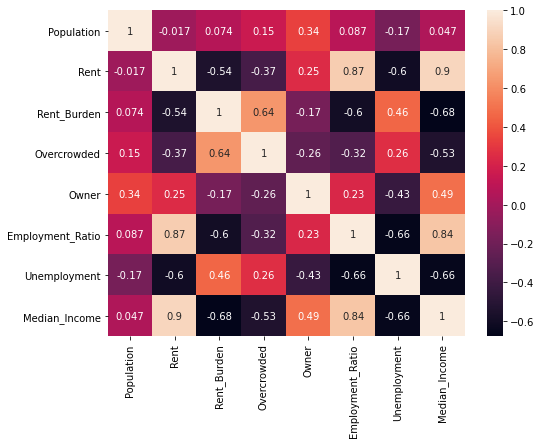

In [7]:
corrMatrix = df.corr()
plt.figure(figsize=(8,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

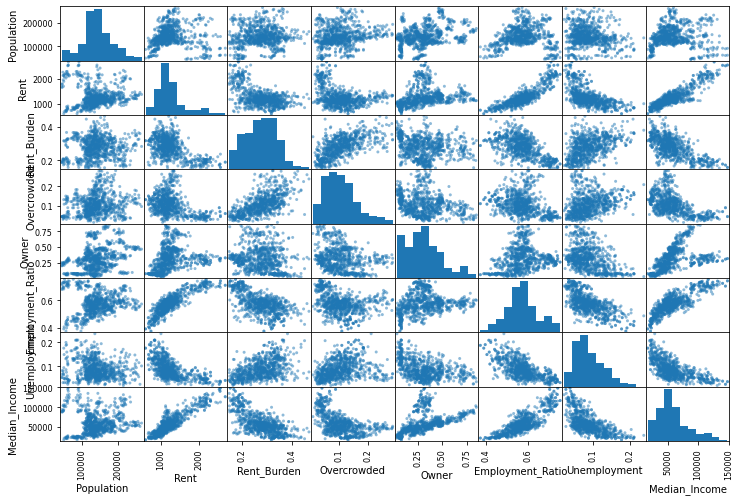

In [8]:
from pandas.plotting import scatter_matrix

# attributes = ['Rent', 'Rent_Burden', 'Median_Income', 'Employment_Ratio']

scatter_matrix(df, figsize=(12,8))

plt.show()

### Model 1: Variables without Scaling/Normalization

In [9]:
# predictors
X = df[['Rent', 'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio']]

# 'Population' and 'Unemployment' are not statistically signficant

# target
y = df['Median_Income'].values.reshape(-1, 1)

y.shape

(821, 1)

In [10]:
# Split into training and testing : 70/30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(574, 5)
(247, 5)


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9403271256588869
Testing Score: 0.9443669652096796


Text(0.5, 1.0, 'Residual Plot')

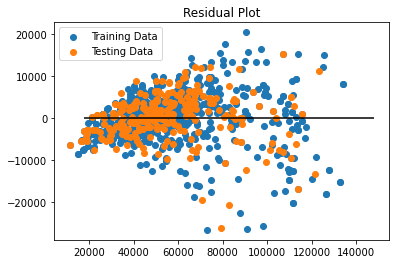

In [13]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, label = "Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, label = "Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [14]:
predictions = model.predict(X_test)
print(f"True output: {y_test[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [49105.67972]
Predicted output: [54233.60023853]
Prediction Error: [-62469.89406147]


In [15]:
import statsmodels.api as sm

sm.OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.119e+04
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                        19:18:12   Log-Likelihood:                         -5869.7
No. Observations:                 574   AIC:                                  1.175e+04
Df Residuals:                     569   BIC:                                  1.177e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rent                42.5897      1.313     32.426      0.000      40.010      45.169
Rent_Burden      -7.752e+04   5101.069    -15.197      0.000   -8.75e+04   -6.75e+04
Overcrowded      -4.373e+04   6989.172     -6.257      0.000   -5.75e+04      -3e+04
Owner             3.658e+04   1620.003     22.581      0.000    3.34e+04    3.98e+04
Employment_Ratio  3.507e+04   4409.175      7.955      0.000    2.64e+04    4.37e+04
==============================================================================
Omnibus:                       55.213   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.863
Skew:                           0.634   Prob(JB):                     6.84e-21
Kurtosis:                       4.508   Cond. No.                     3.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2: Univariate Linear Regression

In [16]:
# predictors
X = df[['Rent']]

# target
y = df['Median_Income'].values.reshape(-1, 1)

y.shape

(821, 1)

In [17]:
# Split into training and testing : 70/30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(574, 1)
(247, 1)


In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.830871681447539
Testing Score: 0.7654505126013116


Text(0.5, 1.0, 'Residual Plot')

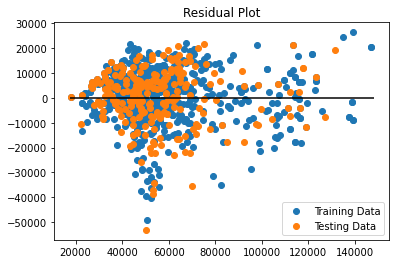

In [20]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

### Model 3: Variables with Scaling

In [21]:
# predictors
X = df[['Population', 'Rent', 'Rent_Burden', 
             'Overcrowded', 'Owner', 
             'Employment_Ratio', 'Unemployment']]

# target
y = df['Median_Income'].values.reshape(-1, 1)

y.shape

(821, 1)

In [22]:
# Split into training and testing : 70/30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(574, 7)
(247, 7)


In [23]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [25]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

training_score_scaled = model_scaled.score(X_train_scaled, y_train_scaled)
testing_score_scaled = model_scaled.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score_scaled}")
print(f"Testing Score: {testing_score_scaled}")

Training Score: 0.940460525912127
Testing Score: 0.9446071747286195


## Feature Engineering: Percent Change (from Previous Year)

### Model 1: Percent Change with variables from original model

In [213]:
df_pct = pd.read_csv('data_pct_change.csv')

In [214]:
df_pct.columns

Index(['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden',
       'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment',
       'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level',
       'Education_No', 'Education_Pct', 'Snap_No', 'Snap_Pct',
       'Population_change', 'Rent_change', 'Rent_Burden_change',
       'Overcrowded_change', 'Owner_change', 'Employment_Ratio_change',
       'Unemployment_change', 'Median_Income_change', 'Uninsured_change',
       'Education_change'],
      dtype='object')

In [215]:
df_pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeFrame                910 non-null    int64  
 1   Fips                     910 non-null    int64  
 2   Location                 910 non-null    object 
 3   Population               910 non-null    float64
 4   Rent                     910 non-null    float64
 5   Rent_Burden              910 non-null    float64
 6   Overcrowded              908 non-null    float64
 7   Owner                    910 non-null    float64
 8   Employment_Ratio         907 non-null    float64
 9   Unemployment             907 non-null    float64
 10  Median_Income            910 non-null    float64
 11  Uninsured_No             715 non-null    float64
 12  Uninsured_Pct            715 non-null    float64
 13  Education_Level          845 non-null    object 
 14  Education_No             8

In [216]:
df_pct = df_pct.apply(lambda col:pd.to_numeric(col, errors='coerce'))

# remove information at the borough level
df_pct = df_pct[df_pct['Fips'] < 1000]

In [217]:
# For our simplest model, without computing the percent change, we will use percents

df = df_pct[['Median_Income_change',
       'Population_change', 'Rent_change', 'Rent_Burden_change',
       'Owner_change', 'Employment_Ratio_change',
       'Uninsured_change','Education_change']]

# Unemployment_change and Overcrowded_change were not signficant predictors

df = df.dropna()

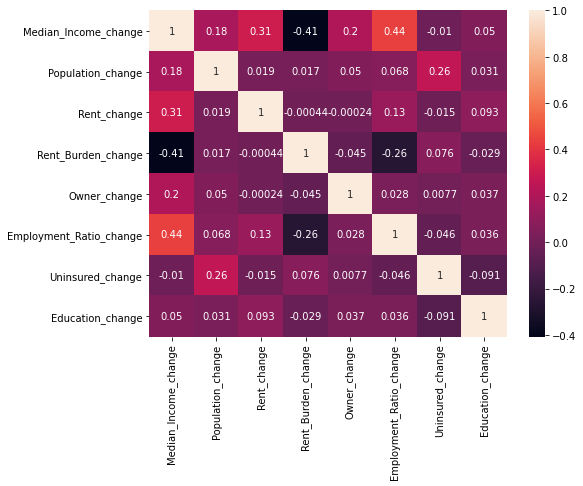

In [218]:
corrMatrix = df.corr()
plt.figure(figsize=(8,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

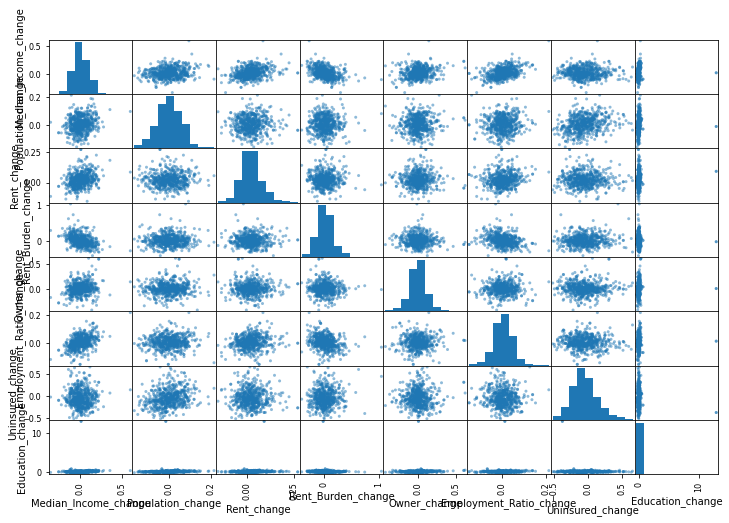

In [219]:
# There is little to no association between variables

scatter_matrix(df, figsize=(12,8))
plt.show()

In [220]:
# predictors
X = df[['Population_change', 'Rent_change', 'Rent_Burden_change',
        'Owner_change', 'Employment_Ratio_change']]



# target
y = df['Median_Income_change'].values.reshape(-1, 1)

y.shape

(590, 1)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(413, 5)
(177, 5)


In [222]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [223]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [224]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

training_score_scaled = model_scaled.score(X_train_scaled, y_train_scaled)
testing_score_scaled = model_scaled.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score_scaled}")
print(f"Testing Score: {testing_score_scaled}")

Training Score: 0.3813140549785672
Testing Score: 0.45002998876694733


In [225]:
# Model evaluation
sm.OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.396
Model:                            OLS   Adj. R-squared (uncentered):              0.389
Method:                 Least Squares   F-statistic:                              53.54
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    1.13e-42
Time:                        20:27:39   Log-Likelihood:                          498.80
No. Observations:                 413   AIC:                                     -987.6
Df Residuals:                     408   BIC:                                     -967.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Population_change           0.2557      0.061      4.165      0.000       0.135       0.376
Rent_change                 0.4417      0.058      7.575      0.000       0.327       0.556
Rent_Burden_change         -0.1887      0.023     -8.052      0.000      -0.235      -0.143
Owner_change                0.1171      0.030      3.928      0.000       0.058       0.176
Employment_Ratio_change     0.5759      0.085      6.777      0.000       0.409       0.743
==============================================================================
Omnibus:                        1.206   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.276
Skew:                           0.126   Prob(JB):                        0.528
Kurtosis:                       2.897   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2: Univariate Linear Regression with Most Predictive Variable (Percent Change)

In [226]:
df = df_pct[['Median_Income_change', 'Employment_Ratio_change']]
df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 1 to 909
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Median_Income_change     764 non-null    float64
 1   Employment_Ratio_change  764 non-null    float64
dtypes: float64(2)
memory usage: 17.9 KB


In [227]:
# predictors
X = df[['Employment_Ratio_change']]

# target
y = df['Median_Income_change'].values.reshape(-1, 1)

y.shape

(764, 1)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(534, 1)
(230, 1)


In [229]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [230]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [231]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

training_score_scaled = model_scaled.score(X_train_scaled, y_train_scaled)
testing_score_scaled = model_scaled.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score_scaled}")
print(f"Testing Score: {testing_score_scaled}")

Training Score: 0.22838274199765685
Testing Score: 0.026708013436152367


### Model 3: Percent Change in Income as Predictor

In [232]:
df = df_pct[['Median_Income_change',
             'Population', 'Rent', 'Rent_Burden', 
             'Overcrowded', 'Owner', 
             'Employment_Ratio', 'Unemployment']]
df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 1 to 909
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Median_Income_change  766 non-null    float64
 1   Population            766 non-null    float64
 2   Rent                  766 non-null    float64
 3   Rent_Burden           766 non-null    float64
 4   Overcrowded           766 non-null    float64
 5   Owner                 766 non-null    float64
 6   Employment_Ratio      766 non-null    float64
 7   Unemployment          766 non-null    float64
dtypes: float64(8)
memory usage: 53.9 KB


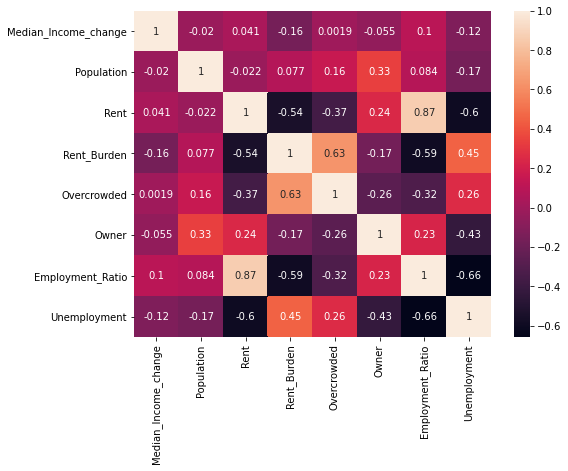

In [233]:
corrMatrix = df.corr()
plt.figure(figsize=(8,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [234]:
# predictors
X = df[['Population', 'Rent', 'Rent_Burden', 
             'Overcrowded', 'Owner', 
             'Employment_Ratio', 'Unemployment']]

# target
y = df['Median_Income_change'].values.reshape(-1, 1)

y.shape

(766, 1)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(536, 7)
(230, 7)


In [236]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [237]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [238]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

training_score_scaled = model_scaled.score(X_train_scaled, y_train_scaled)
testing_score_scaled = model_scaled.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score_scaled}")
print(f"Testing Score: {testing_score_scaled}")

Training Score: 0.07327853857153444
Testing Score: 0.005533077460821878


# Scatter Plots

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, label = "Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, label = "Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")